In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r'C:\Users\DELL\Documents\Data Analytics\Datasets\housing\housing.csv')

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
from matplotlib import pyplot as plt

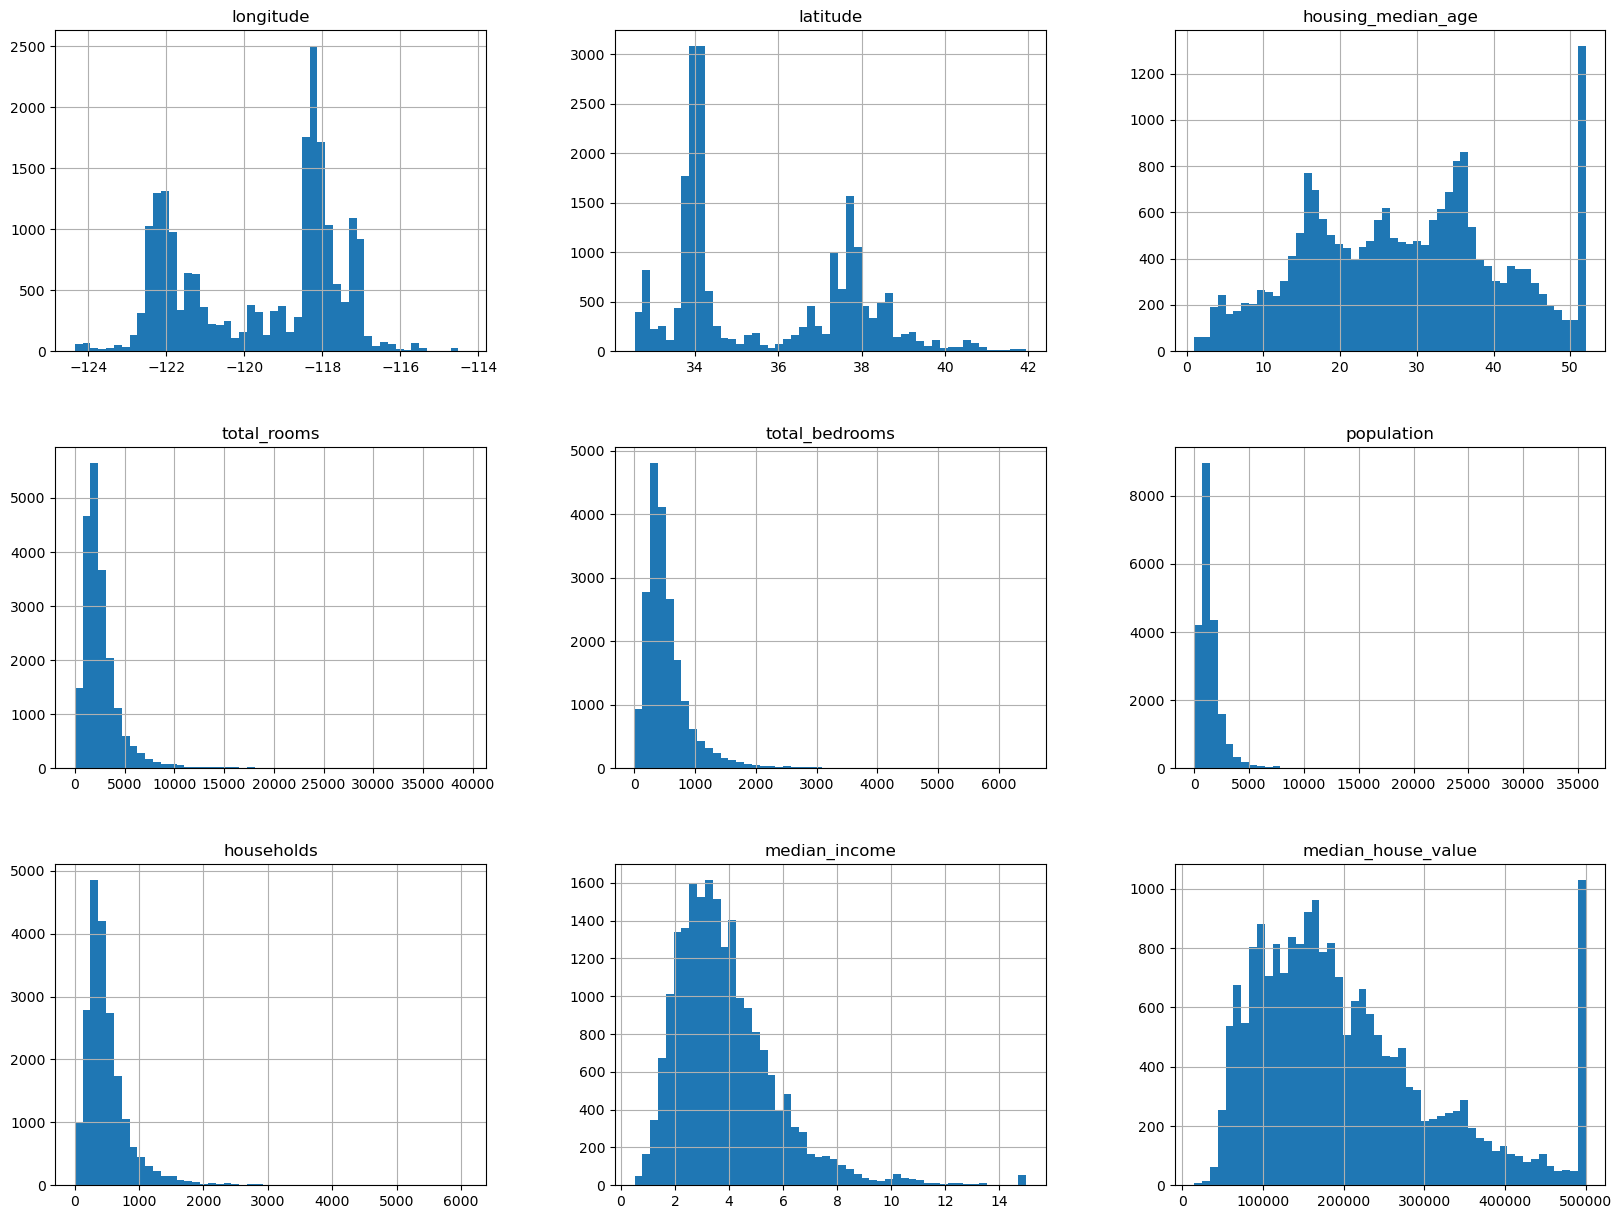

In [9]:
data.hist(bins=50, figsize=(20,15));


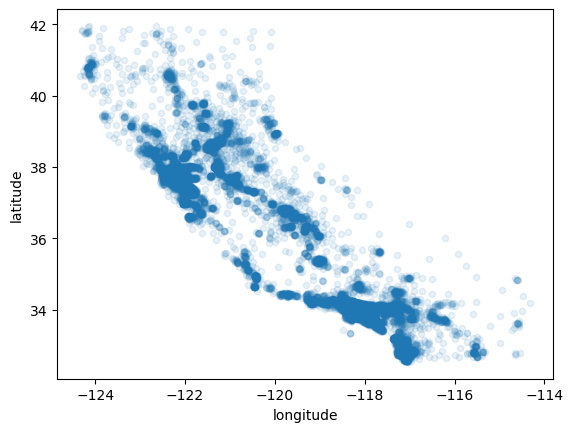

In [10]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha =0.1);

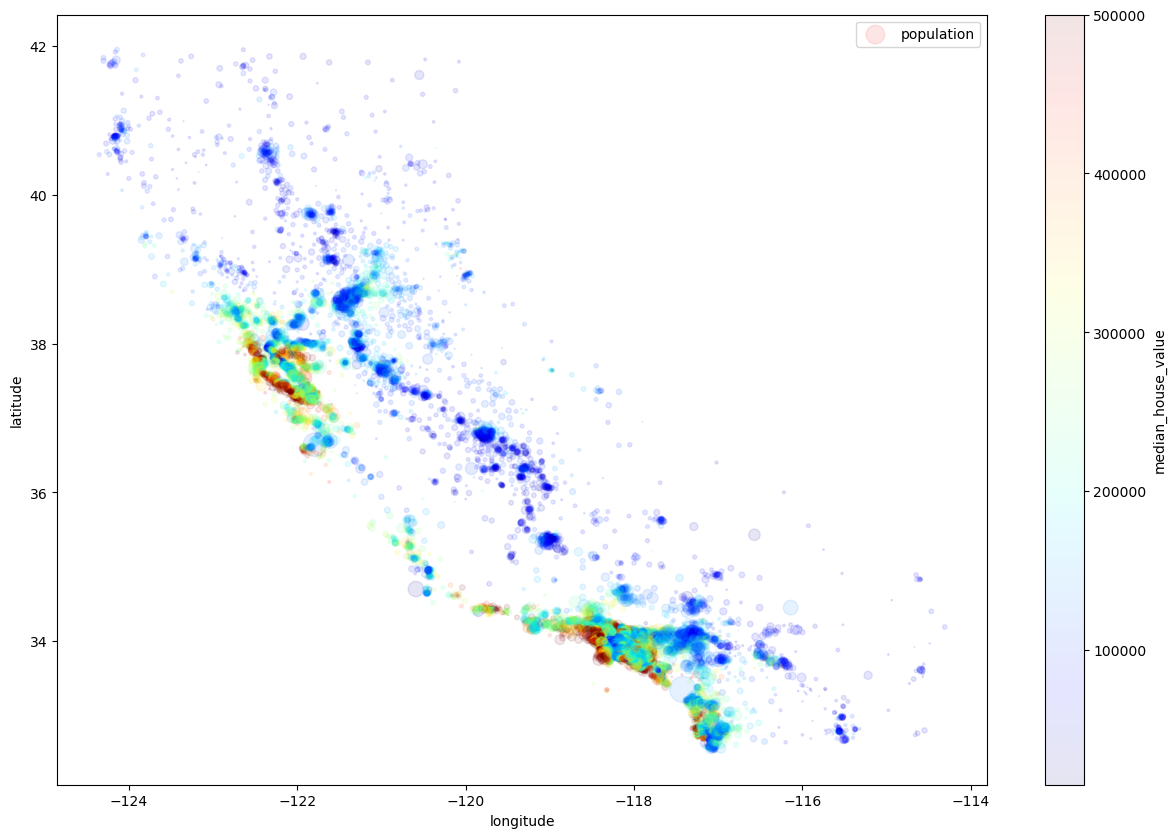

In [11]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha =0.1,figsize=(15,10),
         s= data['population']/100, c= 'median_house_value', label='population',
         cmap=plt.get_cmap('jet'), colorbar =True);

In [12]:
corr_matrix =data.corr()

In [13]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [14]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

longitude


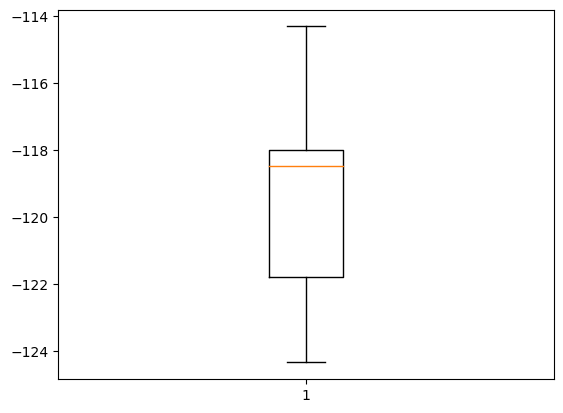

latitude


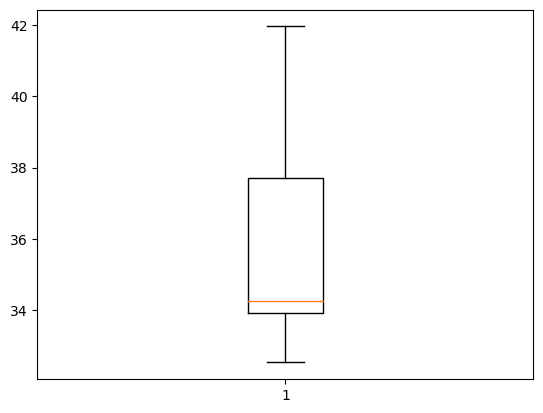

housing_median_age


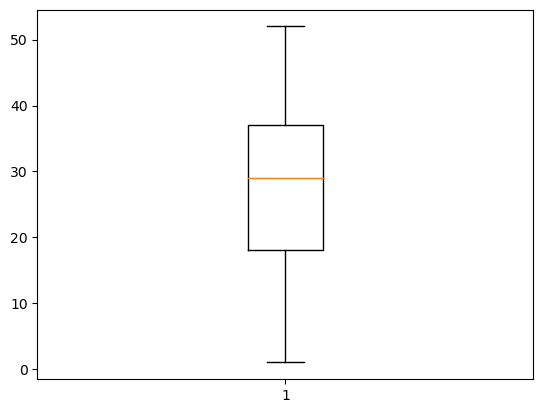

total_rooms


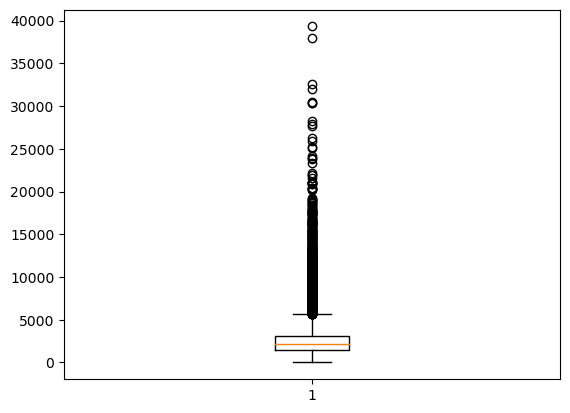

total_bedrooms


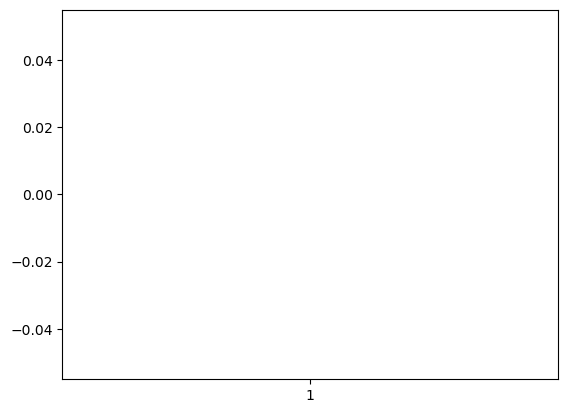

population


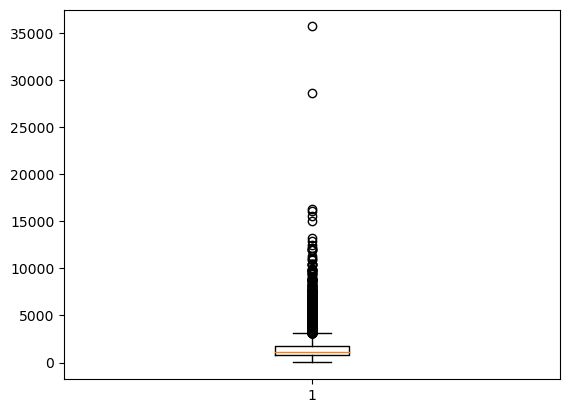

households


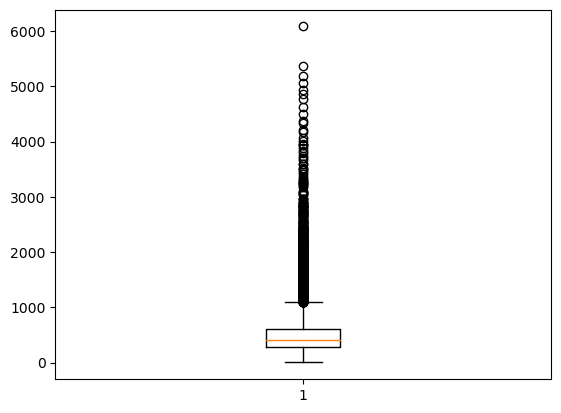

median_income


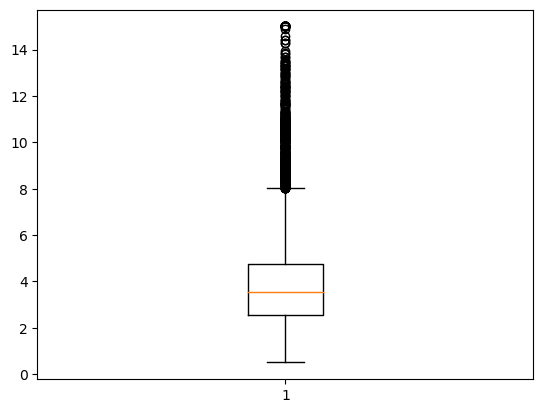

median_house_value


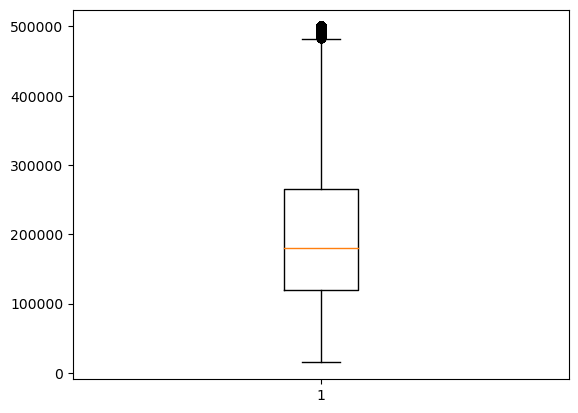

In [16]:
for col in ['longitude', 'latitude','housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']:
    print(col)
    plt.boxplot(data[col])
    plt.show()
   


In [17]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size =0.2, random_state =42)


In [18]:
(train.shape, test.shape)

((16512, 10), (4128, 10))

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median') #From initial exploration the column with missing data has numerous outliers, thus the median strategy is the most suitable measure


In [20]:
#drop the categorical column from the train dataset

train_num = train.drop('ocean_proximity', axis =1)

In [21]:
#fit the simpleimputer to all the remaining columns that contain continuous values

imputer.fit(train_num)

SimpleImputer(strategy='median')

In [22]:
#Transform the train dataset to replace the missing values

X = imputer.transform(train_num)

train_tr = pd.DataFrame(X, columns=train_num.columns)


In [23]:
#Encoding the category options
#Importing the needed libraries

from sklearn.preprocessing import OneHotEncoder
Cat_encoder = OneHotEncoder()


In [24]:
#calling category to train

train_cat = train[['ocean_proximity']]
train_cat

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
...,...
11284,<1H OCEAN
11964,INLAND
5390,<1H OCEAN
860,<1H OCEAN


In [25]:
train_1hot = Cat_encoder.fit_transform(train_cat)
train_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [26]:
Cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [27]:
#feature engineering

train['rooms_per_household'] = train['total_rooms']/train['households']
train['population_per_household'] = train['population']/train['households']
train['bedrooms_per_rooms'] = train['total_bedrooms']/train['total_rooms']

In [28]:
# explore the relationship between the new features and the target median_housing value

corr_matrix = train. corr()

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_rooms         -0.257419
Name: median_house_value, dtype: float64

In [29]:
# Use of the transformation pipeline

#Create the training labels, then use the pipeline library inside the sklearn package

train_label = train['median_house_value'].copy()


In [30]:
train = train.drop('median_house_value', axis =1)

train_num = train.drop('ocean_proximity', axis =1)



In [31]:
# Pipeline transform
#import the libraries

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [32]:
#numerical column pipeline
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy ='median')),('std_scaler', StandardScaler())])

train_num_tr = num_pipeline.fit_transform(train_num)
train_num_tr

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.17491646,
         0.05137609, -0.2117846 ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.40283542,
        -0.11736222,  0.34218528],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.08821601,
        -0.03227969, -0.66165785],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.60675918,
         0.02030568,  0.99951387],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.40217517,
         0.00707608, -0.79086209],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.85144571,
        -0.08535429,  1.69520292]])

In [33]:
#Putting everything together using a column transformer class

num_attribs = list(train_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat', OneHotEncoder(), cat_attribs)])
train_prepared = full_pipeline.fit_transform(train)



In [43]:
pd.DataFrame(train_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.808883,-0.872016,0.507194,-0.603337,-0.805492,-0.675847,-0.742833,1.307215,0.290620,-0.005588,-1.064430,1.0,0.0,0.0,0.0,0.0
16508,1.073144,-0.759688,0.348490,0.203255,0.075188,0.287195,-0.133839,-0.436266,0.600411,0.069722,-0.483382,0.0,1.0,0.0,0.0,0.0
16509,0.599469,-0.755007,0.586545,-0.248786,0.072801,0.289833,0.070909,-0.496973,-0.606759,0.020306,0.999514,1.0,0.0,0.0,0.0,0.0
16510,-1.185540,0.906510,-1.079841,0.429046,0.139628,0.308303,0.154908,0.965450,0.402175,0.007076,-0.790862,1.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn. linear_model import LinearRegression

lin_reg =LinearRegression()
lin_reg.fit(train_prepared, train_label)


LinearRegression()

In [36]:
some_data =train.iloc[:5]
some_labels = train_label.iloc[:5]

some_data_prepared= full_pipeline.transform(some_data)
                                           
print('Predictions:   ', lin_reg.predict(some_data_prepared))

Predictions:    [181746.54359616 290558.74973505 244957.50017771 146498.51061398
 163230.42393939]


In [37]:
print('labels',  list(some_labels))

labels [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [38]:
from sklearn.metrics import mean_squared_error
train_predictions=lin_reg.predict(train_prepared)
lin_mse=mean_squared_error(train_label, train_predictions)
lin_rmse=np.sqrt(lin_mse)

lin_rmse

67593.20745775253

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(train_prepared, train_label)
train_predictions=forest_reg.predict(train_prepared)
forest_mse=mean_squared_error(train_label, train_predictions)
forest_rmse=np.sqrt(forest_mse)

forest_rmse

18614.48461131782

In [61]:
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

In [56]:
tree_reg.fit(train_prepared, train_label)
train_predicitons = tree_reg.predict(train_prepared)
tree_rmse = np.sqrt(mean_squared_error(train_label,train_predictions))

tree_rmse

18614.48461131782

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid=[ {'n_estimators': [3,10,30],'max_features': [2,4,6,8]},{'bootstrap': [False],'n_estimators': [3,10],'max_features': [2,3,4]},]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg, param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(train_prepared, train_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [47]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [50]:
cvres=grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63747.782966574945 {'max_features': 2, 'n_estimators': 3}
54548.7142445751 {'max_features': 2, 'n_estimators': 10}
52581.68493434449 {'max_features': 2, 'n_estimators': 30}
60562.69264153325 {'max_features': 4, 'n_estimators': 3}
52767.66344235727 {'max_features': 4, 'n_estimators': 10}
50254.19634663031 {'max_features': 4, 'n_estimators': 30}
59027.96857327731 {'max_features': 6, 'n_estimators': 3}
51616.028366104365 {'max_features': 6, 'n_estimators': 10}
49923.20989462927 {'max_features': 6, 'n_estimators': 30}
58918.05859548081 {'max_features': 8, 'n_estimators': 3}
52078.802319618335 {'max_features': 8, 'n_estimators': 10}
50111.06329268498 {'max_features': 8, 'n_estimators': 30}
61929.21613871693 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53928.06325165524 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59485.82660992895 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52830.22888565298 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [52]:
import pickle
#from sklearn.externals import joblib

filename='forest_housing_model.pkl'
#joblib.dump(grid_search.best_estimator_,filename)

filename='forest_housing_model.sav'
pickle.dump(grid_search.best_estimator_,open(filename,'wb'))

In [54]:
forest_reg

RandomForestRegressor()